# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="C:/Users/anshmish/Desktop/Personal/Courses/DRLND/deep-reinforcement-learning/p3_collab-compet/Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
n_agents = len(env_info.agents)
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 2
Number of actions: 2
States look like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
States have length: 24


### 3. Train the Agent

In [5]:
def trainAgent(agent, n_episodes=400, timeout=1000, score_window_size=100, solution_score=0.5):
    print('\nTraining agent ')
    scores = []                                                 # list containing scores from each episode
    avg_scores = []                                             # list containing average scores from 100 episode windows
    scores_window = deque(maxlen=score_window_size)             # last 'score_window_size' scores for candidate solution
    
    seed = random.seed(0)
    max_score = 0.0
    best_avg_score = 0.0
    solved = False

    for episode in range(n_episodes):
        start_time = time.time()
        env_info = env.reset(train_mode=True)[brain_name]       # reset the environment
        states = env_info.vector_observations                   # get the current state(s)
        ep_scores = np.zeros(n_agents)
        agent.reset()

        for t in range(timeout):
            # Query agent for actions
            actions = agent.act(states)

            # t_agent_action = time.time()
            env_info = env.step(actions)[brain_name]             # send the action to the environment and get feedback
            # t_env_step = time.time()

            next_states = env_info.vector_observations           # get the next state
            rewards = env_info.rewards                           # get the reward
            dones = env_info.local_done                          # see if episode has finished

            # Move the agent a step
            # t_env_obs = time.time()
            agent.step(states, actions, rewards, next_states, dones)

            ep_scores += np.array(rewards)                       # update the score(s)
            states = next_states                                 # updates the state(s)

            # t_end = time.time()

            # print('\rStep: {:d}\tGet Action: {:.3f}\tEnv Action: {:.3f}\tAgent Step: {:.3f}\tTotal: {:.3f}'.format(t,t_agent_action-t_start, t_env_step-t_agent_action, t_end-t_env_obs, t_end-t_start), end="")

            if np.any(dones):                                    # exit loop if any of the episodes finished
                break

        # Cache the score(s)
        # print(ep_scores)
        scores.append(np.max(ep_scores))
        scores_window.append(np.max(ep_scores))
        avg_scores.append(np.mean(scores_window))
        max_score = max(np.max(ep_scores), max_score)

        episode_time = time.time()-start_time

        # Print episode results
        print('\rEpisode {}\ttime: {:.3f}\tScore: {:.2f}\tAverage Score: {:.3f}\tWindow Max: {:.2f}\tMax Score: {:.2f}'.format(episode, episode_time, np.max(ep_scores), np.mean(scores_window), np.max(scores_window), max_score), end="")

        if episode % 100 == 0:
            print()
            # plt.draw()

        if np.mean(scores_window) > best_avg_score:
            torch.save(agent.actor.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic.state_dict(), 'checkpoint_critic.pth')
            best_avg_score = np.mean(scores_window)

        # Print if solution score achieved
        if not solved and np.mean(scores_window)>=solution_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}\n'.format(episode-100, np.mean(scores_window)))
            solved = True
    
    print("\nTraining Completed!")
    return scores, avg_scores

In [7]:
import torch
import random
from collections import deque
import matplotlib.pyplot as plt
from ddpg import DDPGAgent
import argparse, sys
import time

cuda:0


In [6]:
agent = DDPGAgent(state_size=state_size, action_size=action_size, n_agents=n_agents, seed=48)
scores, avg_scores = trainAgent(agent, n_episodes=10000, timeout=2000)
env.close()

cuda:0

Training agent 
Episode 0	time: 0.322	Score: 0.00	Average Score: 0.000	Window Max: 0.00	Max Score: 0.00
Episode 100	time: 0.388	Score: 0.00	Average Score: 0.006	Window Max: 0.20	Max Score: 0.20
Episode 200	time: 1.279	Score: 0.10	Average Score: 0.045	Window Max: 0.10	Max Score: 0.20
Episode 300	time: 1.031	Score: 0.10	Average Score: 0.070	Window Max: 0.50	Max Score: 0.50
Episode 400	time: 3.151	Score: 0.19	Average Score: 0.078	Window Max: 0.29	Max Score: 0.50
Episode 500	time: 1.132	Score: 0.10	Average Score: 0.085	Window Max: 0.20	Max Score: 0.50
Episode 600	time: 2.206	Score: 0.10	Average Score: 0.101	Window Max: 0.40	Max Score: 0.50
Episode 700	time: 1.366	Score: 0.10	Average Score: 0.093	Window Max: 0.50	Max Score: 0.50
Episode 800	time: 0.739	Score: 0.00	Average Score: 0.045	Window Max: 0.10	Max Score: 0.50
Episode 900	time: 0.740	Score: 0.00	Average Score: 0.020	Window Max: 0.20	Max Score: 0.50
Episode 1000	time: 0.711	Score: 0.00	Average Score: 0.007	Window Max: 0.10	Max

In [9]:
def plotScores(scores, avg_scores):
    # plot the scores
    fig = plt.figure()
    ax = plt.subplot(111)
    plt.plot(np.arange(len(scores)), scores, 'r')
    plt.plot(np.arange(len(scores)), avg_scores, 'b')
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    plt.savefig('LearningCurve.png')

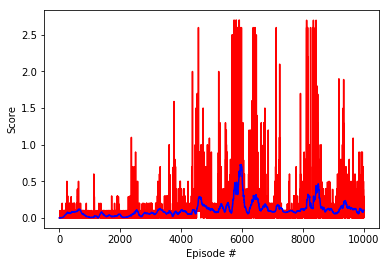

<Figure size 432x288 with 0 Axes>

In [10]:
plotScores(scores, avg_scores)

### Test Agent

In [8]:
def testAgent():
    print("Testing the Agent")
    agent = DDPGAgent(state_size=state_size, action_size=action_size, n_agents=n_agents, seed=48,pretrainedWeightsFile='checkpoint_actor.pth', train = False)
    env_info = env.reset(train_mode=False)[brain_name]      # reset the environment
    states = env_info.vector_observations                   # get the current state
    score = np.zeros(n_agents)                              # initialize the score
    while True:
        actions = agent.act(states)                         # select an action
        env_info = env.step(actions)[brain_name]            # send the action to the environment
        next_states = env_info.vector_observations          # get the next state
        rewards = env_info.rewards                          # get the reward
        dones = env_info.local_done                         # see if episode has finished
        score += np.array(rewards)                          # update the score
        states = next_states                                # roll over the state to next time step
        if np.any(dones):                                   # exit loop if episode finished
            break
    print("Score: {}".format(np.max(score)))
    return score

In [13]:
testAgent()

Testing the Agent
Score: 2.600000038743019


array([2.50000004, 2.60000004])

In [14]:
env.close()